> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [FBI gun data from U.S. Census]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description 
The data we have gathered today was downloaded from census.gov , It contains information about the  number of guns sold in multiple states over the course of almost 2 decades as well as their type and number of regigstration in each state


## Question(s) for Analysis
### 1) what is the most common type of gun purshased in 2016 ?
### 2)Which states had the highest gun registration in 2010 and 2016? Note: we choose 2016 and 2010 because they have the most data available in census_data

## First we import all needed libraries

In [34]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



<a id='wrangling'></a>
## we first coverted the gun_data from xlsx to csv and uploaded it into our notebook 
## then we will explore some properties of the datasets

In [35]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.options.display.max_rows = 15000
df = pd.read_csv('gun_data.csv')
df2= pd.read_csv('u.s.-census-data.csv')

## In the next step I will create a ploting function to reduce the repeation in the code 

In [36]:
def ploting(df ,title, xaxis ,yaxis , kind ,size):
    df.sort_values(by='totals',ascending=False).plot(title=title,x= xaxis, y=yaxis, kind= kind,figsize=(size,size))
    
    
    

## In the next section I will explore the data to check for either excess data to remove or missing data to fill and the general properties of our dataset

In [37]:
#checking our data 
df.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


### This dataset shows us all the guns sold in every month from 1998 till 2017 with their mentioned type as well as how many of these guns are returned .
## Notice that older data has many missing cells so we will focus our work on recent dates

In [38]:
df2.head(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


## The previous dataset have information about each state's population as well as estimates of citizens in all age groups , we can use this data to determine if the gun sales are realistic or not , As one state can have high gun sales just because it has higher population than other states while one state might have low population with high gun sales per capita then we can check if there errors in our analysis or the data is just correct

## checking if there is any NaN values in our data set that we will clean later

In [39]:
print(df.info())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

As we can see in the previous step that there is alot of missing of data that we will deal with in the cleaning process 

In [40]:
df.shape  # number of rows and columns 

(12485, 27)

In [41]:
df.describe(); # some statsical information about the dataset 

In [42]:
df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [43]:
df2.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [44]:
df.dtypes  #exploring all the types of data in our dataset

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

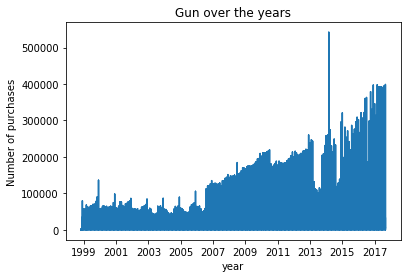

In [45]:
df['month'] = pd.to_datetime(df['month'])
year = df['month']
total=df['totals']

plt.title('Gun over the years')
plt.xlabel('year')
plt.ylabel('Number of purchases')
plt.plot(year, total)
plt.show()

## The previous chart inducates that the gun sales have increased exponentially over the years with a noticable spike in 2014 possible reasons (Outliers , certain event which led people to buys more guns for protection )


### Data Cleaning
#### cleaning the first dataset (gun_data)
 

### If we check census_data it contains alot of columns that are not present in gun_data so we will remove these columns from gun_data

In [46]:
df = df[df.state != 'Guam']
df = df[df.state != 'Puerto Rico']
df = df[df.state != 'District of Columbia']
df = df[df.state != 'Virgin Islands']
df = df[df.state != 'Mariana Islands']

In [47]:

df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


### converting the month columns  data type to datetime to easily filter our data 

In [48]:
df['month'] = pd.to_datetime(df['month'])

In [49]:
df_10 = df[df['month'] == '2010-04-01']
df_10.head(55)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
4895,2010-04-01,Alabama,396.0,NaN,8727.0,8095.0,131.0,394,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20791
4896,2010-04-01,Alaska,0.0,NaN,2650.0,3136.0,64.0,135,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6411
4897,2010-04-01,Arizona,1905.0,NaN,7787.0,5097.0,198.0,309,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16578
4898,2010-04-01,Arkansas,4303.0,NaN,3865.0,3833.0,45.0,197,1.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14563
4899,2010-04-01,California,26930.0,NaN,26170.0,27650.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80750
4900,2010-04-01,Colorado,0.0,NaN,10998.0,9403.0,0.0,3208,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23609
4901,2010-04-01,Connecticut,8726.0,NaN,3994.0,3098.0,97.0,0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15922
4902,2010-04-01,Delaware,0.0,NaN,772.0,626.0,17.0,24,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1439
4904,2010-04-01,Florida,1.0,NaN,26817.0,12952.0,0.0,1207,475.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42794
4905,2010-04-01,Georgia,9061.0,NaN,7215.0,4897.0,95.0,277,0.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24065


In [50]:
df_10.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,50.000000,0.0,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0000
mean,9893.200000,NaN,6274.780000,6984.900000,87.3200,308.220000,10.740000,5.020000,8.380000,0.020000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24517.7400
std,31001.142747,NaN,6873.182889,8145.050054,115.1883,497.993865,67.193236,9.947803,14.557262,0.141421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34280.1673
min,0.000000,NaN,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,963.0000
25%,0.000000,NaN,2006.000000,2837.750000,6.5000,66.250000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7197.5000
50%,934.500000,NaN,3960.500000,4358.000000,51.0000,181.500000,0.000000,0.500000,3.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15242.5000
75%,7048.250000,NaN,7975.250000,8087.750000,112.5000,387.000000,0.000000,7.250000,10.250000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26335.5000
max,194706.000000,NaN,26817.000000,49644.000000,595.0000,3208.000000,475.000000,52.000000,73.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211261.0000


In [51]:
df_16 = df[df['month'] == '2016-07-01' ]
df_16.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,2016-07-01,Alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,...,0.0,NaN,NaN,9.0,5.0,0.0,1.0,1.0,0.0,48927
771,2016-07-01,Alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,...,0.0,NaN,NaN,7.0,17.0,0.0,1.0,0.0,0.0,6793
772,2016-07-01,Arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,...,0.0,NaN,NaN,13.0,9.0,0.0,0.0,1.0,0.0,34496
773,2016-07-01,Arkansas,4116.0,677.0,6323.0,5053.0,325.0,367,2.0,6.0,...,0.0,NaN,NaN,7.0,5.0,1.0,0.0,1.0,0.0,19378
774,2016-07-01,California,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218


In [52]:
df_16.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,0.0,0.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,19011.440000,516.120000,12550.300000,8801.020000,1065.740000,427.800000,4.600000,4.340000,3.880000,0.180000,...,1.300000,NaN,NaN,23.840000,17.720000,1.860000,0.500000,0.720000,0.060000,43710.400000
std,51558.172316,2138.884247,13515.737678,8693.329327,2520.780976,556.719216,20.695065,8.230382,5.691526,0.481918,...,5.603388,NaN,NaN,76.968947,62.758052,4.915656,1.092647,1.641801,0.239898,61544.999748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1565.000000
25%,1308.750000,0.000000,3392.250000,3390.000000,150.250000,58.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,11823.000000
50%,3810.000000,0.000000,9560.500000,6002.500000,326.500000,227.000000,0.000000,0.500000,1.000000,0.000000,...,0.000000,NaN,NaN,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000,25379.500000
75%,14417.750000,1.500000,15574.500000,11859.000000,1114.250000,607.500000,2.000000,6.000000,6.500000,0.000000,...,0.750000,NaN,NaN,11.000000,8.000000,1.000000,0.750000,1.000000,0.000000,46008.500000
max,342858.000000,11933.000000,57902.000000,47594.000000,17297.000000,2698.000000,145.000000,50.000000,26.000000,2.000000,...,39.000000,NaN,NaN,486.000000,424.000000,31.000000,5.000000,10.000000,1.000000,363085.000000


### Cleaning the census_data dataset


In [53]:
df2 = df2.drop(df2.index[65: 85]).reset_index()  #Droppping all the columns that is not associated with gun_data and reset its index

In [54]:
df2 = df2.drop(['Fact Note'], axis =1 )  #Droping the first column 'Fact Note'

### The next step is to fill all NaN values in the dataset (Note: we could also replace NaN values with the mean of the column)

In [55]:
df=df.fillna(df.mean())

In [56]:
df2= df2.fillna(0.0)

<a id='eda'></a>
## Exploratory Data Analysis
#### Now that we have cleaned our data it's time to tackle each of the research question proposed at the start of the analysis

### Research Question 1 ( what is the most common type of gun purshased in 2016 )

In [57]:
df_16.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,2016-07-01,Alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,...,0.0,NaN,NaN,9.0,5.0,0.0,1.0,1.0,0.0,48927
771,2016-07-01,Alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,...,0.0,NaN,NaN,7.0,17.0,0.0,1.0,0.0,0.0,6793
772,2016-07-01,Arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,...,0.0,NaN,NaN,13.0,9.0,0.0,0.0,1.0,0.0,34496
773,2016-07-01,Arkansas,4116.0,677.0,6323.0,5053.0,325.0,367,2.0,6.0,...,0.0,NaN,NaN,7.0,5.0,1.0,0.0,1.0,0.0,19378
774,2016-07-01,California,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218


## The next cell declares a list with all our gun types as well as how many of these types are sold in the 2016 dataframe .
## These lists are used to plot as bar chart to visualize this dataframe

In [58]:
# all available types of guns
guns = ['handgun', 'long_gun', 'other', 'multiple']
no_of_purchases = [df_16['handgun'].sum(), df_16['long_gun'].sum(),df_16['other'].sum(),df_16['multiple'].sum()]

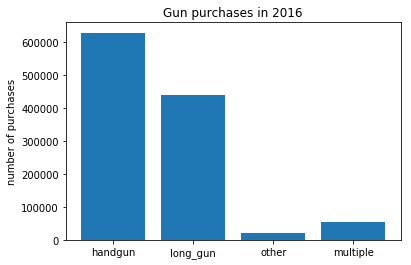

In [59]:
plt.xticks([0,1,2,3], guns)   # listing the name of the gun types on the x-axis
plt.ylabel('number of purchases')
plt.title('Gun purchases in 2016') 
plt.bar(guns, no_of_purchases)
plt.legend()

## From the previous chart handguns are dominating the market , we depict that people might want a smaller firearm that they can handle or they just want the cheaper option

# Answer
### As you can see the handgun is the most common gun type purchased in 2016

### Research Question 2  (Which states had the highest gun registration in 2010 and 2016?)

In [60]:
#List 10 states with high gun in 2010
df_10.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
4913,2010-04-01,Kentucky,194706.0,NaN,6274.0,6352.0,104.0,440,1.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211261
4942,2010-04-01,Utah,103873.0,NaN,2379.0,2996.0,0.0,143,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109391
4899,2010-04-01,California,26930.0,NaN,26170.0,27650.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80750
4941,2010-04-01,Texas,9221.0,NaN,24481.0,21343.0,595.0,1232,0.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65012
4909,2010-04-01,Illinois,36904.0,NaN,8557.0,8005.0,0.0,463,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53929
4935,2010-04-01,Pennsylvania,211.0,NaN,1.0,49644.0,0.0,393,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50249
4945,2010-04-01,Virginia,0.0,NaN,25259.0,18158.0,0.0,720,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44137
4904,2010-04-01,Florida,1.0,NaN,26817.0,12952.0,0.0,1207,475.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42794
4932,2010-04-01,Ohio,1.0,NaN,17333.0,11342.0,329.0,635,0.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31312
4940,2010-04-01,Tennessee,9391.0,NaN,12533.0,8066.0,0.0,463,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30453


## The previous table is all the guns purshased in 2010 in every state orderd from the most number of guns sold to the least

## Now lets visualize to easily deduce the meaning of the data 

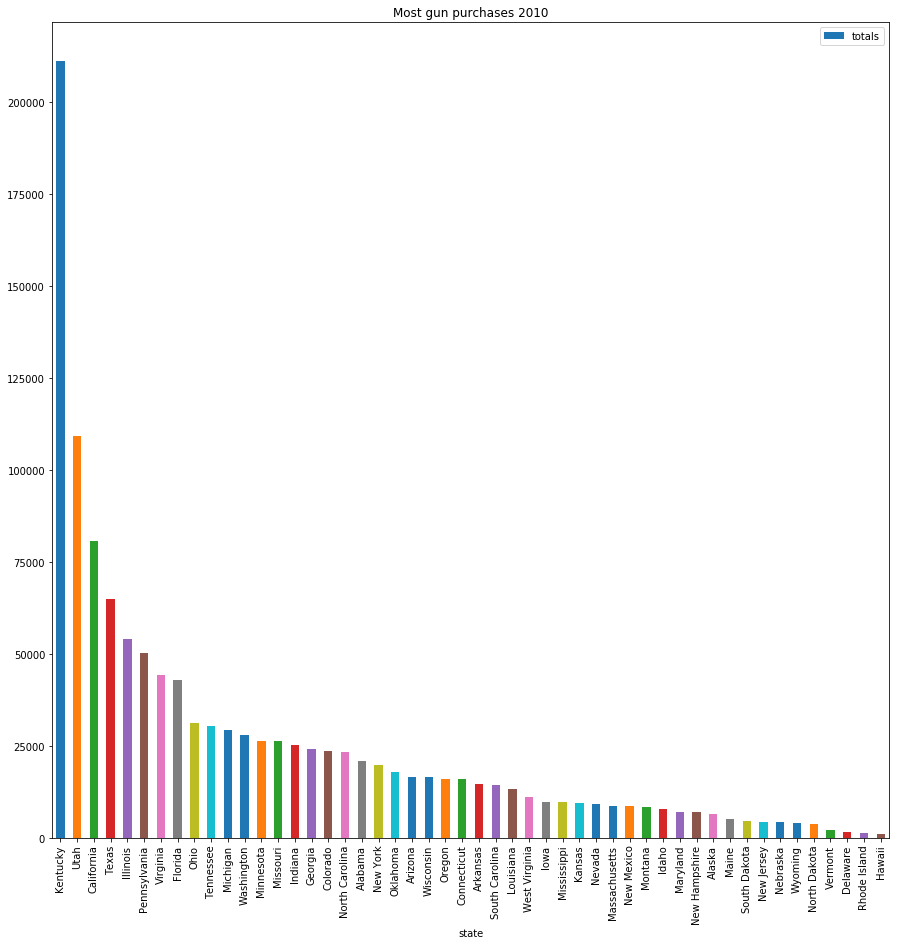

In [61]:
# plot 2010 
ploting(df_10 ,'Most gun purchases 2010','state', 'totals' ,'bar',15)

In [62]:
df_16.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
788,2016-07-01,Kentucky,342858.0,0.0,9378.0,6615.0,321.0,534,0.0,7.0,...,0.0,NaN,NaN,13.0,8.0,2.0,0.0,0.0,0.0,363085
774,2016-07-01,California,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218
784,2016-07-01,Illinois,125075.0,8969.0,21421.0,11881.0,0.0,881,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,168227
816,2016-07-01,Texas,24634.0,0.0,50499.0,34266.0,4046.0,2698,0.0,50.0,...,1.0,NaN,NaN,45.0,49.0,3.0,3.0,0.0,0.0,127207
779,2016-07-01,Florida,28106.0,0.0,57902.0,28000.0,4504.0,2324,12.0,8.0,...,1.0,NaN,NaN,39.0,12.0,1.0,0.0,0.0,0.0,125208
785,2016-07-01,Indiana,53844.0,0.0,19508.0,12191.0,1600.0,644,8.0,1.0,...,1.0,NaN,NaN,23.0,9.0,1.0,3.0,0.0,0.0,88340
810,2016-07-01,Pennsylvania,26819.0,0.0,46843.0,11793.0,19.0,0,145.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,86137
807,2016-07-01,Ohio,11762.0,55.0,27876.0,17720.0,2166.0,1232,0.0,8.0,...,0.0,NaN,NaN,44.0,12.0,1.0,1.0,1.0,0.0,63148
815,2016-07-01,Tennessee,1915.0,11933.0,26276.0,16118.0,0.0,1374,0.0,0.0,...,5.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,57653
780,2016-07-01,Georgia,20555.0,0.0,15342.0,8597.0,635.0,632,0.0,12.0,...,0.0,NaN,NaN,3.0,3.0,1.0,0.0,0.0,0.0,49183


## The previous table is all the guns purshased in 2010 in every state orderd from the most number of guns sold to the least

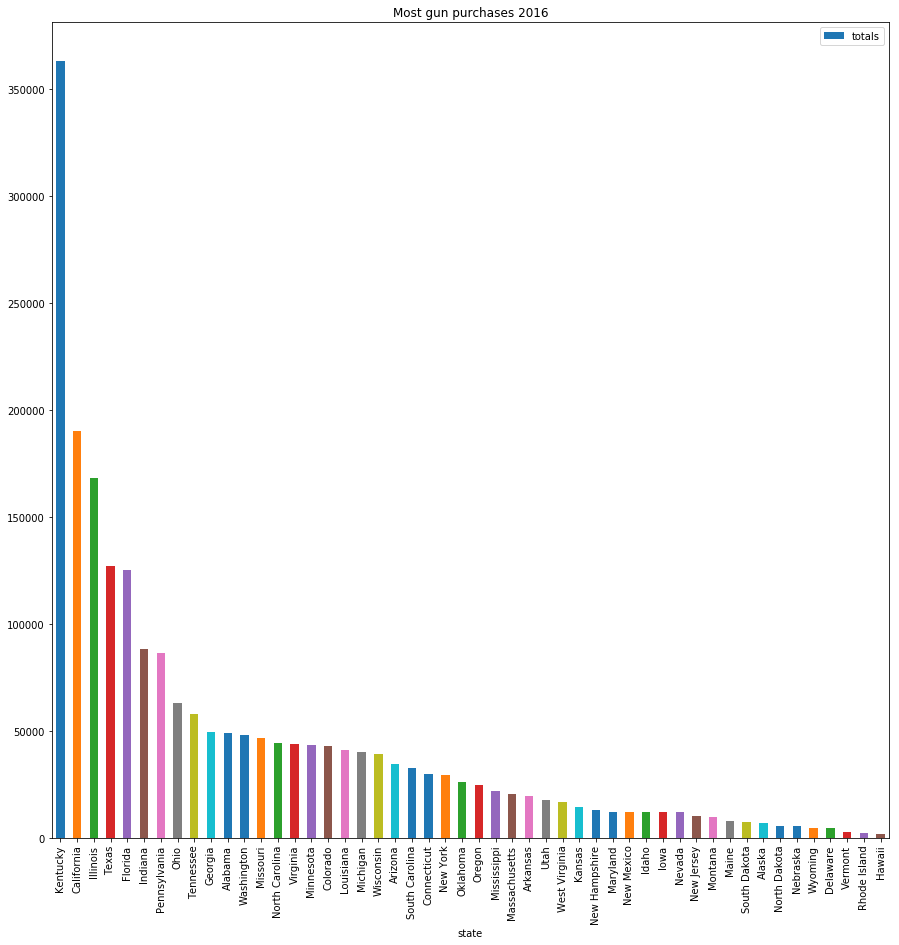

In [63]:
ploting(df_16 ,'Most gun purchases 2016','state' , 'totals' ,'bar' ,15)

## The previous two plot are used to depict the number of guns purshased in every state on two seperate years (2010,2016) As you can see gun purchases increased to almost the double in every state 

# Answers:
### Highest gun registration in 2010 from high to low:
- Kentucky	
- Utah	
- California	
- Texas	
- Illinois	
- Pennsylvania	
- Virginia	
- Florida	
- Ohio	
- Tennessee	
### Highest gun registration in 2016 from high to low:
- Kentucky	
- California	
- Illinois	
- Texas	
- Florida	
- Indiana
- Pennsylvania	
- Ohio	
- Tennessee	
- Georgia	


# discussion:
### 1) In the first plot we visualized the total gun purchased over the years and whether they increased or decreased and we deduced they increased greatly with an enormous spike in 2014 where mor research must be done to decide whether there was a certain event or just an outlier

### 2) In the second chart we wanted to know which gun type was most purchased in 2016 and we discovered it was handguns

###  3) While in the two two plot are used to depict the number of guns purshased in every state on two seperate years (2010,2016) As you can see gun purchases increased to almost the double in every state 


<a id='conclusions'></a>
## Conclusions

#### In conclusion , AFter analysing and visualizing our data we found that states such as Kentucky, California , Texas and Illinois are the most common states with high gun records in 2010 and 2016 , secondly the most type of gun people tend to buy is a handgun which implies that this type is just cheap and convinent for their needs or they just want a simplest type of firearm for protection while other types might be used for hunting ,practice, etc.


## Limitations
#### If we take a look at the gun registrations each year Kentuky is almost double the second most state every year which inducates there might be outliers in the data collected and must be further researched , secondly there are data about (Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands) that are not taken into account in the census_data 

## refrences:

#### https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html
#### https://stackoverflow.com/questions/65040182/display-bars-in-plot-by-ascending-descending-order-matplotlib-python
#### https://stackoverflow.com/questions/71369078/init-got-an-unexpected-keyword-argument-max-rows
#### https://stackoverflow.com/questions/42460983/pandas-typeerror-sort-values-missing-1-required-positional-argument-by

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0